<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Missing Value Imputation</h2>
<h4>DAT-5390 | Computational Analytics with Python</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Team: Team2
Elias Heuser, Gaelle Crespin, Mizuki Sugino, Ryo Morisada

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Start by subsetting for your Hult region.

In [1]:
# package imports
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # enhanced data visualization
import warnings                 # warnings


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# suppressing warnings
warnings.filterwarnings(action = 'ignore')


# data import
world_df = pd.read_excel(io = "./WDIW Dataset.xlsx")


# subesetting Hult region
team_df = world_df[ world_df["Hult Region"] == "Northern Africa & Arabia" ]


# checking results
team_df.head(n = 5)

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)",Births attended by skilled health staff (% of total),"Death rate, crude (per 1,000 people)","Education, Doctoral or equivalent, population 25+ (%)","Education, at least Bachelor's or equivalent, population 25+ (%)","Education, at least Master's or equivalent, population 25+ (%)","Education, at least completed lower secondary, population 25+ (%)","Education, at least completed post-secondary, population 25+ (%)","Education, at least completed primary, population 25+ years (%)","Education, at least completed short-cycle tertiary, population 25+ (%)","Education, at least completed upper secondary, population 25+ (%)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),GINI index (World Bank estimate),"Government expenditure on education, total (% of government expenditure)",Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,"Industry (including construction), value added (% of GDP)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),People below $3.10 (2011 PPP) poverty line by out-of-pocket health care expenditure,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population living in slums (% of urban population),"Population, female","Population, male","Population, total",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
0,BHR,Bahrain,Northern Africa & Arabia,Bumblebee,100.0,100.0,100.0,13.368,28.557551,3.049778,25.507773,0.290782,2.190623,14.365,NaN,2.368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.047,35.278999,63.674000,2.010,3.543269e+10,3.803522,NaN,7.18035,NaN,NaN,NaN,NaN,NaN,41.308024,77.032000,NaN,NaN,74.010759,4.389060,158.256809,0.275044,19.841494,77.786204,2.372302,1920.403524,4.677987,39.021092,0.936143,554226.0,939848.0,1494074.0,NaN,NaN,NaN,NaN,NaN,NaN,10.814,57.446131,778.000031,NaN,89.186,4.785713
2,CYP,Cyprus,Northern Africa & Arabia,Bumblebee,100.0,100.0,100.0,4.582,43.373201,19.234009,24.139192,1.749129,2.618302,10.668,NaN,6.952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.528,17.047001,80.425003,1.337,2.214186e+10,4.468879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.357739,80.672000,NaN,NaN,56.535436,1.627517,138.479760,0.400665,16.836628,69.748016,13.415356,127.670996,0.807965,

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Missing Value Proportions</h3><br>
<strong>a)</strong> Write a code that outputs the proportion of missing values for each feature (column) in your Hult region. Round the missing value proportions to four decimal places and sort them in descending order.

In [2]:
# missing value proportions
team_df.isnull().mean(axis = 0).round(decimals = 4).sort_values(ascending = False)

Income share held by highest 20%                                                       1.00
Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)                    1.00
Income share held by third 20%                                                         1.00
Income share held by second 20%                                                        1.00
Income share held by lowest 20%                                                        1.00
Income share held by fourth 20%                                                        1.00
GINI index (World Bank estimate)                                                       1.00
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)                    1.00
Education, at least completed short-cycle tertiary, population 25+ (%)                 1.00
Education, at least completed primary, population 25+ years (%)                        1.00
Education, at least completed post-secondary, population 25+ (%)                

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>b)</strong> Complete the code below to store the missing value proportions as a DataFrame. Then, complete the loop to group features based on their proportions of missing values.

In [3]:
# storing above as a DataFrame
missing_df = team_df.isnull().mean(axis = 0).round(decimals = 4).sort_values(ascending = False)


missing_df = missing_df.reset_index()
missing_df.columns = ['feature', "mv_proportion"]


# missing value lists
mv_max  = []
mv_hi   = []
mv_mid  = []
mv_low  = []


# grouping missing value proportions
for index, value in missing_df.iterrows():

    # features with mv proportion of 1.00
    if missing_df.loc[ index, 'mv_proportion' ] == 1.00:
        mv_max.append(missing_df.loc[ index, 'feature' ])

    # features with [0.67, 1.00) mv proportion
    elif missing_df.loc[ index, 'mv_proportion' ] >= 0.67:
        mv_hi.append(missing_df.loc[ index, 'feature' ])

    # features with [0.33, 0.67) mv proportion
    elif missing_df.loc[ index, 'mv_proportion' ] >= 0.33:
        mv_mid.append(missing_df.loc[ index, 'feature' ])

    # features with (0.0, 0.33) mv proportion
    elif missing_df.loc[ index, 'mv_proportion' ] >= 0.0:
        mv_low.append(missing_df.loc[ index, 'feature' ])

    # passing on features that have no missing values
    else:
        pass


# checking results
print(f"""

MV Proportions
--------------
 --------
| [1.00] |
 --------
{mv_max}

 --------------
| [0.67, 1.00) |
 --------------
{mv_hi}

 -------------
|[0.33, 0.67) |
 -------------
{mv_mid}

 ------------
| (0.0, 0.33) |
 ------------
{mv_low}
""")



MV Proportions
--------------
 --------
| [1.00] |
 --------
['Income share held by highest 20%', 'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)', 'Income share held by third 20%', 'Income share held by second 20%', 'Income share held by lowest 20%', 'Income share held by fourth 20%', 'GINI index (World Bank estimate)', 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)', 'Education, at least completed short-cycle tertiary, population 25+ (%)', 'Education, at least completed primary, population 25+ years (%)', 'Education, at least completed post-secondary, population 25+ (%)', 'Education, at least completed lower secondary, population 25+ (%)', "Education, at least Master's or equivalent, population 25+ (%)", "Education, at least Bachelor's or equivalent, population 25+ (%)", 'Education, Doctoral or equivalent, population 25+ (%)', 'Education, at least completed upper secondary, population 25+ (%)', 'Births attended by skilled health staff (% o

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Develop Missing Value Rationales</h3><br>
Choose one feature from each of the three missing value groups (<em>mv_hi</em>, <em>mv_mid</em>, and <em>mv_low</em>). Note that you may adjust the thresholds in the code about if a group has no features. Investigate your chosen features and develop a rationale for why missing values are present. This will likely require an investigation of countries outside of your Hult region, as well as additional research. (minimum of five sentences and one relevant source (cited in A.P.A format) per missing value group).
<br><br>
<strong>a)</strong> Investigate and develop a rationale for the feature in the <strong>mv_hi</strong> group. Note that

In [4]:
## code Step 2a here ##

# Feature: Literacy rate, adult total (% of people ages 15 and above)
mv_hi_literacy = "Literacy rate, adult total (% of people ages 15 and above)"

# Missing value proportion of feature in the Hult region
team_mv_hi = team_df[mv_hi_literacy].isnull().mean(axis=0).round(decimals=4)

# Missing value proportion of this feature in the global dataset
world_mv_hi = world_df[mv_hi_literacy].isnull().mean(axis=0).round(decimals=4)

# Compare both values
compare_dfs = [team_mv_hi, world_mv_hi]
print(f"Missing Value Proportion of {mv_hi_literacy}"
      f"\nTeam Region: {compare_dfs[0]:.2%}\nWorld: {compare_dfs[1]:.2%}")


Missing Value Proportion of Literacy rate, adult total (% of people ages 15 and above)
Team Region: 88.00%
World: 95.39%


According to data obtained from the World Bank, the data missing rate for "Literacy rate, adult total (% of people ages 15 and above)" in Northern Africa & Arabia is 88.00%, lower than the world average of 95.39%. This means that Northern Africa & Arabia has a higher percentage of the relevant data. The reason for this is that in regions such as Northern Africa & Arabia, which include many poor countries, international aid agencies and policymakers often require accurate data in order to provide effective support. IIED advocates that the collection of appropriate data will lead to the resolution of issues in poor regions. Literacy rates are related to the Sustainable Development Goals (SDGs) "Quality Education for All." For this reason, the collection of literacy rate data is being promoted internationally, and it is possible that a lot of data is being collected precisely because it is a poor region.<br>
In conclusion, the reason why the missing data rate rate in the region is low is likely related to the need for international support and efforts to achieve the SDGs.<br>

Sources:<br>

Global Goals. (n.d.). Goal 4: Quality education. Retrieved January 22, 2025, from https://www.globalgoals.org/goals/4-quality-education/<br>

International Institute for Environment and Development. (n.d.). Community-driven data collection in informal settlements. Retrieved January 22, 2025, from https://www.iied.org/17406iied

<em>Provide your missing value rationale and relevant source for Step 2a here.</em>





<strong>b)</strong> Investigate and develop a rationale for the feature in the <strong>mv_mid</strong> group.

In [5]:
## code Step 2b here ##
# Feature: Tax revenue (% of GDP)
mv_mid_tax = 'Tax revenue (% of GDP)'

# missing value proportion of feature in the Hult region
team_mv_mid = team_df[mv_mid_tax].isnull().mean(axis = 0).round(decimals = 4)

# missing value proportion of this feature in the global dataset
world_mv_mid = world_df[mv_mid_tax].isnull().mean(axis = 0).round(decimals = 4)

# compare both values
compare_dfs = [team_mv_mid, world_mv_mid]
print(f"Missing Value Proportion of {mv_mid_tax}"
      f"\nTeam Region: {compare_dfs[0]:.2%}\nWorld:{compare_dfs[1]:.2%}")


Missing Value Proportion of Tax revenue (% of GDP)
Team Region: 60.00%
World:41.01%


In [6]:
# proportions of missing values per region from the global dataset
world_mv_mid_regions = (world_df.groupby('Hult Region')[mv_mid_tax]
                    .apply(lambda x: x.isnull().mean())
                    .round(decimals=3))
world_mv_mid_regions

Hult Region
Australia & Oceania                            0.350
Carribean Islands & Parts of Latin America     0.684
Continental America                            0.417
East/South Africa                              0.286
East/Southeast Asia                            0.300
Eastern Europe                                 0.227
Middle East, Russia & India                    0.250
Northern Africa & Arabia                       0.600
Sub-Saharan Africa                             0.609
Western Europe                                 0.364
World                                          0.000
Name: Tax revenue (% of GDP), dtype: float64

In [7]:
# countries that have missing value for the feature in Hult region
team_mv_mid_countries = team_df[team_df[mv_mid_tax].isnull()]["Country Name"].unique()
team_mv_mid_countries

array(['Bahrain', 'Iraq', 'Kuwait', 'Oman', 'Qatar', 'Syria', 'Yemen',
       'Algeria', 'Chad', 'Egypt', 'Libya', 'Mauritania', 'Niger',
       'Sudan', 'Tunisia'], dtype=object)

<em>Provide your missing value rationale and relevant source for Step 2b here.</em>





The data deficiency rate in the "Northern Africa & Arabia" region is 60.00%, significantly higher than the global average of 41.01%, and it also tends to be higher compared to other regions. Several factors contribute to this discrepancy.

First, in the Middle East and North Africa (MENA) region, standards and practices for collecting and reporting tax revenue data vary widely from country to country. According to the International Monetary Fund's (IMF) 2023 report, many MENA countries, such as Iraq, Chad, and Egypt, have either no personal income tax (PIT) system in place or apply it only to a very limited extent. In some cases, tax systems do not exist at all and tax revenue data are lacking.

In addition, resource-rich countries such as Bahrain and Qatar, members of the Gulf Cooperation Council (GCC), rely heavily on revenues from oil and natural gas. As a result, these countries minimize direct taxation and lack the infrastructure necessary to collect taxes from their residents, contributing to data shortages (Mansour & Zolt, 2023).

Moreover, many of the countries with missing data are classified as Fragile and Conflict-Affected States (FCS). In these countries, political instability and weak institutional frameworks prevent comprehensive management of tax revenue data. In regions where distrust of government is widespread, political challenges and lack of public trust further impede the reporting and submission of accurate tax information, undermining data transparency and reliability (Mansour & Zolt, 2023).

These combined factors account for the high rate of missing tax revenue data in the "Northern Africa & Arabia" region.

Sources:

Mansour, M., & Zolt, E. M. (2023). Personal income taxes in the Middle East and North Africa: Prospects and possibilities. International Monetary Fund. https://www.imf.org/en/Publications/WP/Issues/2023/02/17/Personal-Income-Taxes-in-the-Middle-East-and-North-Africa-Prospects-and-Possibilities-529963?utm_source=chatgpt.com

<strong>c)</strong> Investigate and develop a rationale for the feature in the <strong>mv_low</strong> group.

In [8]:
## code Step 2c here ##
# Feature: Access to electricity, rural (% of rural population)
mv_lo_electricity = 'Access to electricity, rural (% of rural population)'

# missing value proportion of feature
team_mv_lo = team_df[mv_lo_electricity].isnull().mean(axis = 0).round(decimals = 4)

# missing value proportion of this feature in world_df
world_mv_lo = world_df[mv_lo_electricity].isnull().mean(axis = 0).round(decimals = 4)

# compare both values
compare_dfs = [team_mv_lo, world_mv_lo]
print(f"Missing Value Proportion of {mv_lo_electricity}"
      f"\nTeam Region: {compare_dfs[0]:.2%}\nWorld: {compare_dfs[1]:.2%}")


Missing Value Proportion of Access to electricity, rural (% of rural population)
Team Region: 4.00%
World: 2.76%


In [9]:
# proportions of missing values per region from world_df
world_mv_lo_regions = (world_df.groupby('Hult Region')[mv_lo_electricity]
                    .apply(lambda x: x.isnull().mean())
                    .round(decimals=3))
world_mv_lo_regions

Hult Region
Australia & Oceania                            0.100
Carribean Islands & Parts of Latin America     0.000
Continental America                            0.000
East/South Africa                              0.048
East/Southeast Asia                            0.000
Eastern Europe                                 0.000
Middle East, Russia & India                    0.000
Northern Africa & Arabia                       0.040
Sub-Saharan Africa                             0.087
Western Europe                                 0.000
World                                          0.000
Name: Access to electricity, rural (% of rural population), dtype: float64

In [10]:
# countries and their region that have missing value for the feature
world_mv_lo_countries = world_df.loc[world_df[mv_lo_electricity].isnull(),
                ['Country Name', 'Hult Region']]
world_mv_lo_countries

,Country Name,Hult Region
3,American Samoa,Australia & Oceania
5,Angola,Sub-Saharan Africa
43,"Congo, Dem. Rep.",Sub-Saharan Africa
119,Madagascar,East/South Africa
139,Nauru,Australia & Oceania
202,Mauritania,Northern Africa & Arabia


<em>Provide your missing value rationale and relevant source for Step 2c here.</em>

From the databank.world, it can be seen that many countries in this region (Northern Africa & Arabia) have only recently started to report this attribute (World Development Indicators).
It can be seen that in the regions that have missing values in this attribute are in Africa or are very small countries in the region "Australia & Oceania". This poor data collection can be due to limited technical possibilities and different priorities in data collection resources in these countries. <br>
Mauritania does not stand out in terms of missing values across all features in this region. Mauritania reports most of the features that other countries in this region report as well. This could be due to participation in committees like the African Union and the Arab Maghreb Union which might implement reporting standards to track key indicators for their development strategies. Mauritania is the only the country in the region that does not report this feature. While 61.2% of the population live in urban areas (2023) (World Bank), rural areas might have limited data collection resources, poor data collection infrastructure, or are not prioritized in terms of reporting this feature. Though, the country reports "Access to electricity (% of population)" and "Access to electricity, urban (% of urban population)" which indicates that they generally collect data for the feature "Access to electricity".


Sources:<br>
World Development Indicators (n.d.). <em>DataBank.</em> https://databank.worldbank.org/reports.aspx?source=2&series=EG.ELC.ACCS.ZS&country=

World Bank (n.d.). <em>The World Bank in Mauritania.</em> https://www.worldbank.org/en/country/mauritania/overview#1





<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Distribution Analysis</h3><br>
Complete the code below for the three features you selected. This will render overlayed histograms so that you may compare the regional and world-wide distributions of your features, giving you better ideas as to which imputation strategies to adopt.

In [ ]:
# sns.histplot documentation
help(sns.histplot)

<br>

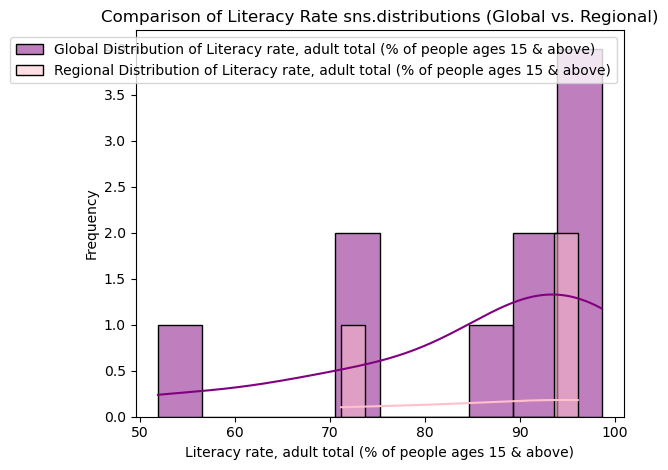

In [11]:
## feature from the mv_hi group ##

# histogram (full data)
sns.histplot(data=world_df[~world_df[mv_hi_literacy].isnull()],
             x=mv_hi_literacy,
             bins=10,
             color="purple",
             kde=True,
             label="Global Distribution of Literacy rate, adult total (% of people ages 15 & above)",
             alpha=0.5)

# histogram (Hult region)
sns.histplot(data=team_df[(team_df["Hult Region"] == "Northern Africa & Arabia") &
                          ~team_df[mv_hi_literacy].isnull()],
             x=mv_hi_literacy,
             bins=10,
             color="pink",
             kde=True,
             label="Regional Distribution of Literacy rate, adult total (% of people ages 15 & above)",
             alpha=0.5)


# rendering the visual
plt.title(label = "Comparison of Literacy Rate sns.distributions (Global vs. Regional)")
plt.xlabel("Literacy rate, adult total (% of people ages 15 & above)"),
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

<br>

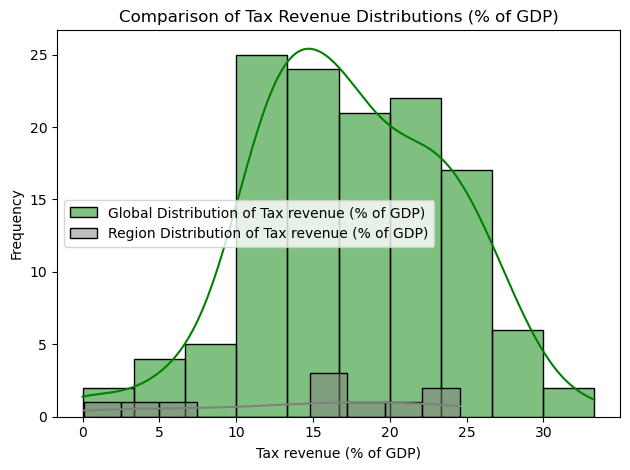

In [12]:
## feature from the mv_mid group ##
# histogram (full data)
sns.histplot(data=world_df[~world_df[mv_mid_tax].isnull()],
             x=mv_mid_tax,
             bins=10,
             color="green",
             kde=True,
             label="Global Distribution of Tax revenue (% of GDP)",
             alpha=0.5)


# histogram (Hult region)
sns.histplot(data=team_df[(team_df["Hult Region"] == "Northern Africa & Arabia") &
                          ~team_df[mv_mid_tax].isnull()],
             x=mv_mid_tax,
             bins=10,
             color="grey",
             kde=True,
             label="Region Distribution of Tax revenue (% of GDP)",
             alpha=0.5)


# rendering the visual
plt.title(label = "Comparison of Tax Revenue Distributions (% of GDP)")
plt.xlabel("Tax revenue (% of GDP)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

<br>

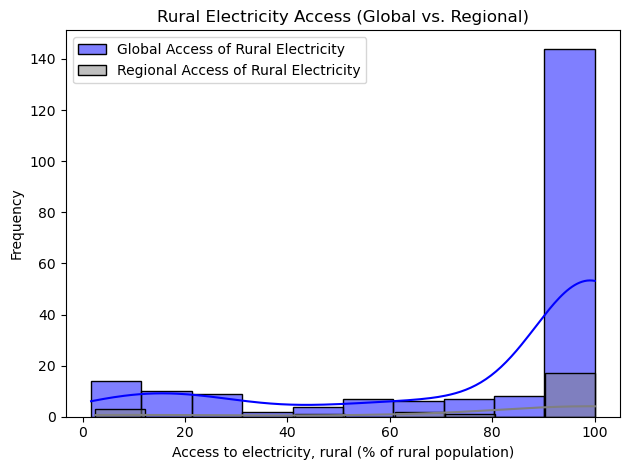

In [13]:
## feature from the mv_low group ##

# histogram (full data)
sns.histplot(data=world_df[~world_df[mv_lo_electricity].isnull()],
             x=mv_lo_electricity,
             bins=10,
             color="blue",
             kde=True,
             label="Global Access of Rural Electricity ",
             alpha=0.5)

# histogram (Hult region)
sns.histplot(data=team_df[(team_df["Hult Region"] == "Northern Africa & Arabia") &
                           ~team_df[mv_lo_electricity].isnull()],
             x=mv_lo_electricity,
             bins=10,
             color="grey",
             kde=True,
             label="Regional Access of Rural Electricity",
             alpha=0.5)


# rendering the visual
plt.title(label = "Rural Electricity Access (Global vs. Regional)")
plt.xlabel("Access to electricity, rural (% of rural population)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Missing Value Imputation</h3><br>
Develop and code an imputation strategy for each of your chosen features. Remember, missing value imputation should minimally impact a feature's original distribution. Below are the available strategies:

* Impute using a <strong>global</strong> (full dataset) descriptive statistic (mean, min, max, etc.).
* Impute using a <strong>local</strong> (your Hult region) descriptive statistic (mean, min, max, etc.).
* Drop the feature from the full dataset.

Below is the help documentation for two methods that can be used to address this challenge.

In [ ]:
# documentation for the .fillna() method
help(pd.DataFrame.fillna)

<br>

In [ ]:
# documentation for the .drop() method
help(pd.DataFrame.drop)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>a)</strong> What is your strategy for the feature in the <strong>mv_hi</strong> group? (minimum of two sentences)

<em>Write your response to Step 4a here.</em>

In [14]:
## code Step 4a here ##
# Drop the column
team_df = team_df.drop(columns=[mv_hi_literacy])

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>b)</strong> What is your strategy for the feature in the <strong>mv_mid</strong> group? (minimum of two sentences)

<em>Write your response to Step 4b here.</em>

In [15]:
## code Step 4b here ##

# Calculate the global median for "Tax revenue (% of GDP)"
global_median_mid = world_df[mv_mid_tax].median()

# Fill missing values in team_df with the global median
team_df[mv_mid_tax] = team_df[mv_mid_tax].fillna(global_median_mid)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>c)</strong> What is your strategy for the feature in the <strong>mv_low</strong> group? (minimum of two sentences)

<em>Write your response to Step 4c here.</em>

In the first step, the global dataset will be compared to the regional subset. It shows that the global and regional means are similar and the medians are exactly the same. In this case, the difference between global and regional is minimal. Though, regional statistics generally give a more accurate representation of the region since "Northern Africa & Arabia" includes many developing countries in which the respective development of features can vary heavily. While most countries have access to electricity in rural areas of 100.0 (median), some countries have lower values, going as low as 2.49 in Mali. These outliers have a  significant impact on the mean. For this reason, the median is the more robust measure to choose for imputation.

In [16]:
## code Step 4c here ##

# calculating global mean and median for the feature
global_mean_lo = world_df[mv_lo_electricity].mean()
global_median_lo = world_df[mv_lo_electricity].median()

# calculating regional mean and median for the feature
region_mean_lo = team_df[mv_lo_electricity].mean()
region_median_lo = team_df[mv_lo_electricity].median()

# showing results
print("Global Mean:",global_mean_lo," |", "Global Median:",global_median_lo,
      "\nRegion Mean:",region_mean_lo," |", "Region Median:",region_median_lo)

# Fill missing values in team_df with the regional median
team_df[mv_lo_electricity] = team_df[mv_lo_electricity].fillna(region_median_lo)


Global Mean: 81.06782487261566  | Global Median: 100.0 
Region Mean: 82.68371183468314  | Region Median: 100.0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 5: Checking Results</h3><br>
After imputing, complete and run the histogram codes below to ensure the original distribution of each feature was not severely impacted. Note that you may get an error if you dropped any of your chosen features from the dataset (this will not impact your grade).

KeyError: 'Literacy rate, adult total (% of people ages 15 and above)'

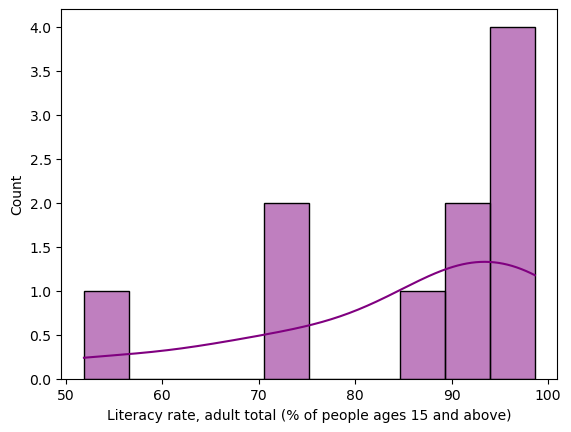

In [17]:
## feature from the mv_hi group ##

# histogram (full data)
sns.histplot(data=world_df[~world_df[mv_hi_literacy].isnull()],
             x=mv_hi_literacy,
             bins=10,
             color="purple",
             kde=True,
             label="Global Distribution of Literacy rate, adult total (% of people ages 15 & above)",
             alpha=0.5)

# histogram (Hult region "Northern Africa & Arabia")
sns.histplot(data=team_df[(team_df["Hult Region"] == "Northern Africa & Arabia") &
                          ~team_df[mv_hi_literacy].isnull()],
             x=mv_hi_literacy,
             bins=10,
             color="pink",
             kde=True,
             label="Regional Distribution of Literacy rate, adult total (% of people ages 15 & above)",
             alpha=0.5)


# rendering the visual
plt.title(label = "Comparison of Literacy Rate sns.distributions (Global vs. Regional)")
plt.xlabel("Literacy rate, adult total (% of people ages 15 & above)"),
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

<br>

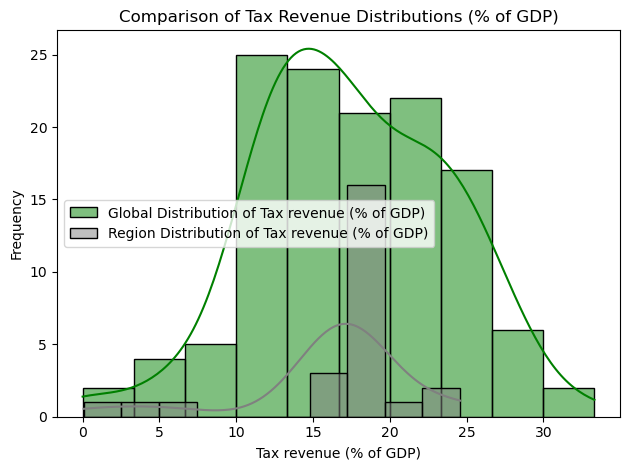

In [18]:
## feature from the mv_mid group ##

# histogram (full data)
sns.histplot(data=world_df[~world_df[mv_mid_tax].isnull()],
             x=mv_mid_tax,
             bins=10,
             color="green",
             kde=True,
             label="Global Distribution of Tax revenue (% of GDP)",
             alpha=0.5)


# histogram (Hult region "Northern Africa & Arabia")
sns.histplot(data=team_df[(team_df["Hult Region"] == "Northern Africa & Arabia") &
                          ~team_df[mv_mid_tax].isnull()],
             x=mv_mid_tax,
             bins=10,
             color="grey",
             kde=True,
             label="Region Distribution of Tax revenue (% of GDP)",
             alpha=0.5)


# rendering the visual
plt.title(label = "Comparison of Tax Revenue Distributions (% of GDP)")
plt.xlabel("Tax revenue (% of GDP)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

<br>

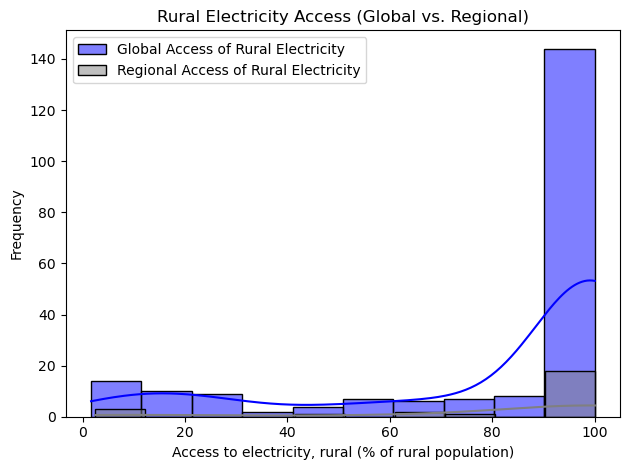

In [19]:
## feature from the mv_low group ##


# histogram (full data)
sns.histplot(data=world_df[~world_df[mv_lo_electricity].isnull()],
             x=mv_lo_electricity,
             bins=10,
             color="blue",
             kde=True,
             label="Global Access of Rural Electricity ",
             alpha=0.5)

# histogram (Hult region "Northern Africa & Arabia")
sns.histplot(data=team_df[(team_df["Hult Region"] == "Northern Africa & Arabia") &
                           ~team_df[mv_lo_electricity].isnull()],
             x=mv_lo_electricity,
             bins=10,
             color="grey",
             kde=True,
             label="Regional Access of Rural Electricity",
             alpha=0.5)


# rendering the visual
plt.title(label = "Rural Electricity Access (Global vs. Regional)")
plt.xlabel("Access to electricity, rural (% of rural population)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 5: Advanced Imputation</h3><br>
Complete the code below by inputting your Hult region and your chosen features that. Then, run the following codes to implement a KNN imputer. This is an algorithm we will discuss later in our program. For now, note that KNN makes predictions based on similarities from other observations (rows).
<br><br>
Note: Features with 100% missing values will not work in the code below.

In [20]:
# new methods from sklearn!
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# reimporting the data
world_df = pd.read_excel(io = "./WDIW Dataset.xlsx")


# subesetting Hult region
team_df = world_df[ world_df["Hult Region"] == "Northern Africa & Arabia" ]


# selecting features
features = [mv_hi_literacy,
            mv_mid_tax,
            mv_lo_electricity]

<br>

In [21]:
## Scaling and Imputing (advanced)

# scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X = team_df[features])


# imputing with KNN
imputer = KNNImputer(n_neighbors = 5)
imputed_scaled_data = imputer.fit_transform(scaled_data)


# reversing the scaling
imputed_data = scaler.inverse_transform(imputed_scaled_data)

# attaching results to team_df
team_df[features] = imputed_data

team_df[features]

,"Literacy rate, adult total (% of people ages 15 and above)",Tax revenue (% of GDP),"Access to electricity, rural (% of rural population)"
0,87.771917,15.349857,100.000000
2,87.771917,24.526825,100.000000
8,87.771917,15.349857,100.000000
12,87.771917,24.578412,100.000000
14,87.771917,15.027160,100.000000
17,96.035950,14.120642,100.000000
29,87.771917,15.254560,100.000000
38,96.111549,15.813551,100.000000
50,87.771917,15.349857,100.000000
58,87.771917,3.384836,100.000000


<br>

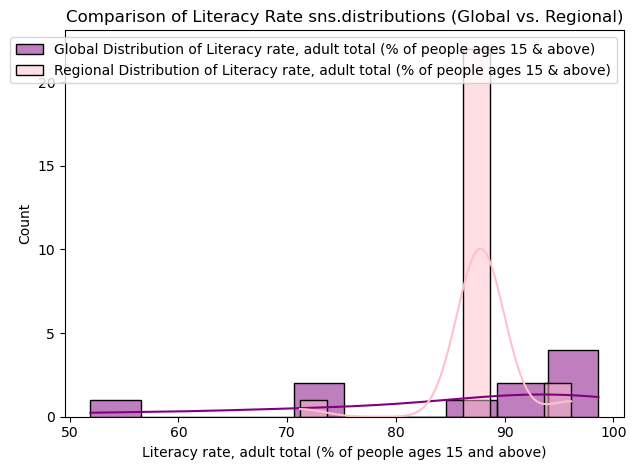

In [22]:
## feature from the mv_hi group ##

# histogram (full data)
sns.histplot(data=world_df[~world_df[mv_hi_literacy].isnull()],
             x=mv_hi_literacy,
             bins=10,
             color="purple",
             kde=True,
             label="Global Distribution of Literacy rate, adult total (% of people ages 15 & above)",
             alpha=0.5)


# histogram (Hult region "Northern Africa & Arabia")
sns.histplot(data=team_df[(team_df["Hult Region"] == "Northern Africa & Arabia") &
                          ~team_df[mv_hi_literacy].isnull()],
             x=mv_hi_literacy,
             bins=10,
             color="pink",
             kde=True,
             label="Regional Distribution of Literacy rate, adult total (% of people ages 15 & above)",
             alpha=0.5)



# rendering the visual
plt.title(label = "Comparison of Literacy Rate sns.distributions (Global vs. Regional)")
plt.tight_layout()
plt.legend()
plt.show()

<br>

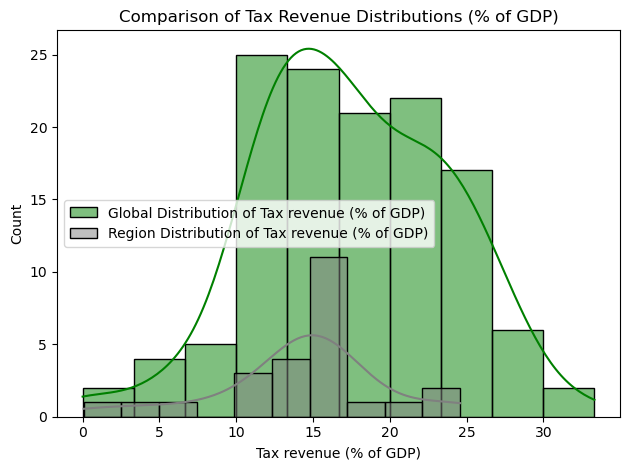

In [23]:
## feature from the mv_mid group ##

# histogram (full data)
sns.histplot(data=world_df[~world_df[mv_mid_tax].isnull()],
             x=mv_mid_tax,
             bins=10,
             color="green",
             kde=True,
             label="Global Distribution of Tax revenue (% of GDP)",
             alpha=0.5)


# histogram (Hult region "Northern Africa & Arabia")
sns.histplot(data=team_df[(team_df["Hult Region"] == "Northern Africa & Arabia") &
                          ~team_df[mv_mid_tax].isnull()],
             x=mv_mid_tax,
             bins=10,
             color="grey",
             kde=True,
             label="Region Distribution of Tax revenue (% of GDP)",
             alpha=0.5)


# rendering the visual
plt.title(label = "Comparison of Tax Revenue Distributions (% of GDP)")
plt.tight_layout()
plt.legend()
plt.show()

<br>

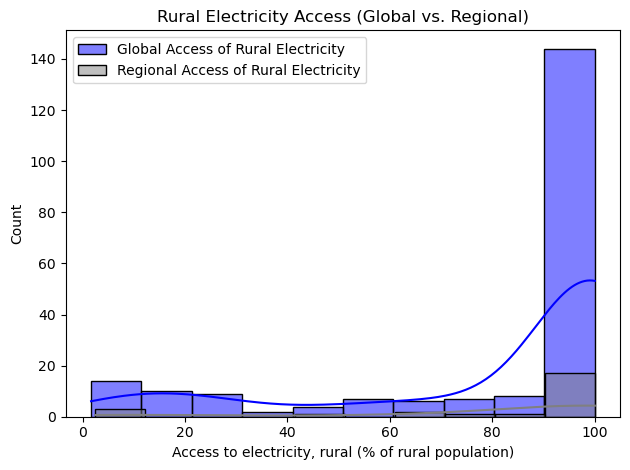

In [24]:
## feature from the mv_low group ##

# histogram (full data)
sns.histplot(data=world_df[~world_df[mv_lo_electricity].isnull()],
             x=mv_lo_electricity,
             color="blue",
             bins=10,
             kde=True,
             label="Global Access of Rural Electricity ",
             alpha=0.5)


# histogram (Hult region "Northern Africa & Arabia")
sns.histplot(data=team_df[(team_df["Hult Region"] == "Northern Africa & Arabia") &
                           ~team_df[mv_lo_electricity].isnull()],
             x=mv_lo_electricity,
             bins=10,
             color="grey",
             kde=True,
             label="Regional Access of Rural Electricity",
             alpha=0.5)


# rendering the visual
plt.title(label = "Rural Electricity Access (Global vs. Regional)")
plt.tight_layout()
plt.legend()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 6: Reflection</h3><br>
Each imputation strategy has its advantages in certain situations. Based on your results, briefly explain when to use each strategy. (minimum of three sentences per strategy)

* Impute using a global or local descriptive statistic.
* Impute using an algorithm such as KNN.
* Drop a feature from the dataset.

<em>Write your response to Step 6 here.</em><br>
When deciding on whether to use global or local descriptive statistics for imputation, it is important to check the differences in descriptive statistics between the global dataset and the local subset. When the local subset has a proportion of missing values that classified as medium, it is sensible to use the global data for imputing missing values since it is less sensitive to outliers and a high number of extreme values (mean / median). For a proportion of missing values that is classified as low, imputing missing values with the local dataset is more sensible since there are values are available in the subset and imputing values from the local dataset can represent the local region better.<br>
<br>
Imputing data using an algorithm is more sensible than using descriptive statistics when there are patterns or clusters in the dataset since it compares the values of the respective row with the values from its row-neighbors. Using an algorithm has a big advantage when there are many rows of data available to compare the respective row to. It creates realistic values based on the differences and variances in the other data compared to the row where a value is missing. For cases like "Tax revenue (mv_mid)" with a medium missing value rate, KNN is more suitable than global or local statistics because it understands the existing values of countries and puts them into perspective to other countries. E.g. if Mauritania is a rather developed country compared to other countries in the region, it is more likely that a missing value in a specific feature is also rather "good" compared to other countries.<br>
<br>
Dropping a feature completely from the dataset is sensible when no or little data is available. After creating imputations and analyzing the effects via visualization, it became clear that the imputation might not be sensible to reflect the reality. The distribution of values are heavily distorted. For this reason, it was most sensible to drop the feature from the dataset.

<br>